# Explore here

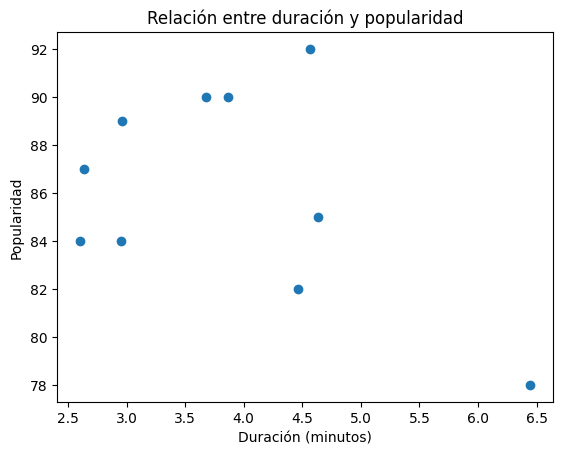

In [6]:
from dotenv import load_dotenv
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# load the .env file variables
load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

artist_name = "Kendrick Lamar"
results = sp.search(q=f"artist:{artist_name}", type="artist")
artist_id = results["artists"]["items"][0]["id"]

top_tracks = sp.artist_top_tracks(artist_id)["tracks"]

import pandas as pd

tracks_data = []
for track in top_tracks:
    tracks_data.append({
        "name": track["name"],
        "popularity": track["popularity"],
        "duration_ms": track["duration_ms"]
    })

df = pd.DataFrame(tracks_data)
df["duration_min"] = df["duration_ms"] / 60000  # Convertir a minutos
df = df.drop(columns=["duration_ms"])

import matplotlib.pyplot as plt 

plt.scatter(df["duration_min"], df["popularity"])
plt.xlabel("Duración (minutos)")
plt.ylabel("Popularidad")
plt.title("Relación entre duración y popularidad")
plt.show()

